In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# Dataset 

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
iris = datasets.load_iris()
X_data = iris.data
y_data = iris.target

In [3]:
X_data.shape, y_data.shape

((150, 4), (150,))

In [4]:
np.unique(y_data)

array([0, 1, 2])

In [5]:
X_data_filter = X_data[np.logical_or(y_data == 0, y_data == 1)]
y_data_filter = y_data[np.logical_or(y_data == 0, y_data == 1)]

In [6]:
X_data_filter.shape, y_data_filter.shape, np.unique(y_data_filter)

((100, 4), (100,), array([0, 1]))

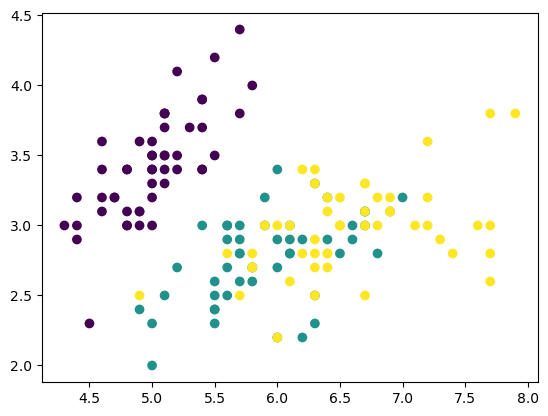

In [7]:
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data)

# Model

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
clf = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9777777777777777


In [10]:
scores = []
for k in range(1, 100):
    clf = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test))

Text(0.5, 1.0, 'KNN Performance')

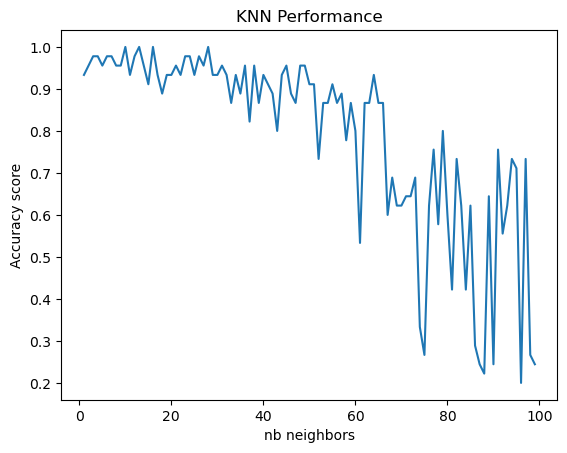

In [11]:
plt.plot(np.arange(1, 100), scores)
plt.xlabel("nb neighbors")
plt.ylabel("Accuracy score")
plt.title("KNN Performance")

In [46]:
def K_Nearest_Neighbours(
        x_train: np.ndarray,
        y_train: np.ndarray,
        x_test: np.ndarray,
        k: int
):
    y_pred = []
    for value in x_test:
        distances = {}
        for index, value_two in enumerate(x_train):
            distances[index] = np.linalg.norm(value - value_two)
            distances = dict(sorted(distances.items(), key=lambda x:x[1]))
            index = list(distances)[:k]
            neighbors_labels = [y_train[i] for i in index]
            y_pred.append(np.bincount(neighbors_labels).argmax())  
    return y_pred

In [47]:
scores = []
for k in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(
        X_data,
        y_data,
        test_size=0.3
    )
    y_pred = K_Nearest_Neighbours(
        x_train=X_train,
        x_test=X_test,
        y_train=y_train,
        k=k
    )


ValueError: x and y must have same first dimension, but have shapes (99,) and (0,)

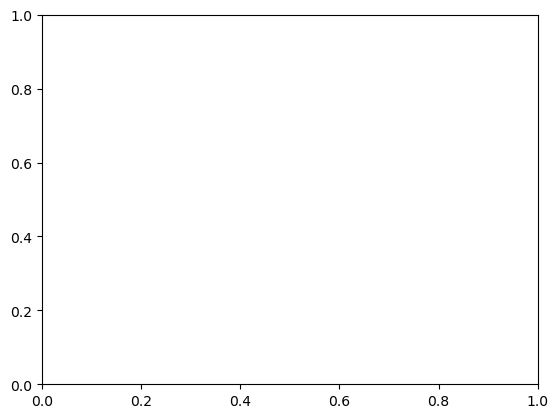

In [48]:
plt.plot(np.arange(1, 100), scores)
plt.xlabel("nb neighbors")
plt.ylabel("Accuracy score")